In [32]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load the dataset
file_path = "train_and_test2.csv"  # Replace this path if needed
df = pd.read_csv(file_path)

In [15]:
df.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,-0.503099,0,1,0,3,2.0,0
1,38.0,0.734463,1,1,0,1,0.0,1
2,26.0,-0.490053,1,0,0,3,2.0,1
3,35.0,0.383037,1,1,0,1,2.0,1
4,35.0,-0.487637,0,0,0,3,2.0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1309 non-null   float64
 1   Fare      1309 non-null   float64
 2   Sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Pclass    1309 non-null   int64  
 6   Embarked  1309 non-null   float64
 7   2urvived  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


In [17]:
df.describe()

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
count,1309.000000,1.309000e+03,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.503186,-2.442660e-17,0.355997,0.498854,0.385027,2.294882,1.493506,0.261268
std,12.905241,1.000000e+00,0.478997,1.041658,0.865560,0.837836,0.814244,0.439494
min,0.170000,-6.432184e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,22.000000,-4.906175e-01,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,28.000000,-3.638643e-01,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,35.000000,-3.877131e-02,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,80.000000,9.258489e+00,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


In [4]:
# Dropping irrelevant columns
irrelevant_cols = [col for col in df.columns if "zero" in col or col in ["Passengerid", "Name", "Ticket"]]
df.drop(columns=irrelevant_cols, inplace=True)


In [5]:
# Checking missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    2
2urvived    0
dtype: int64


In [6]:
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\khush\AppData\Local\Temp\ipykernel_10880\2254197105.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\khush\AppData\Local\Temp\ipykernel_10880\2254197105.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

# Exploratory Data Analysis

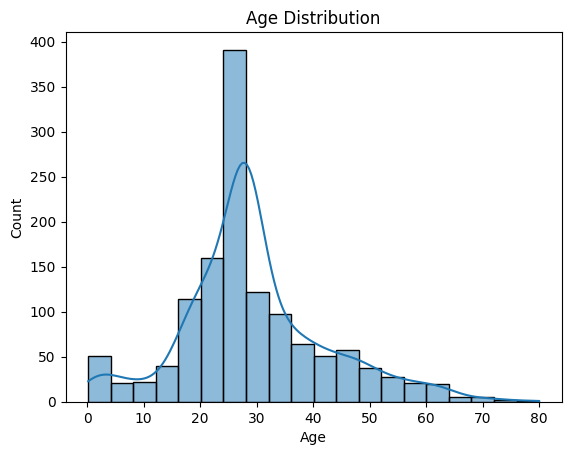

In [20]:
# Age Distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

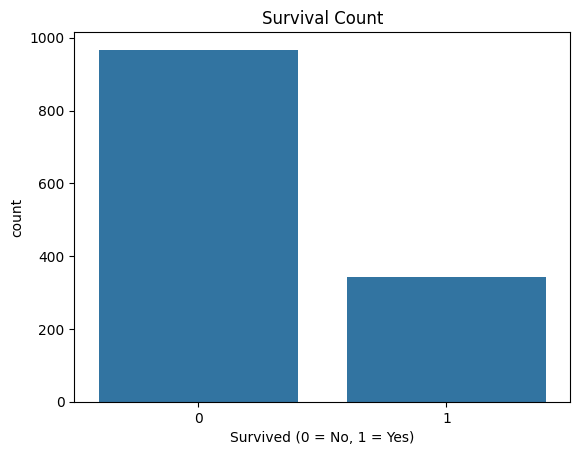

In [21]:
# Survival Count
sns.countplot(x='2urvived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

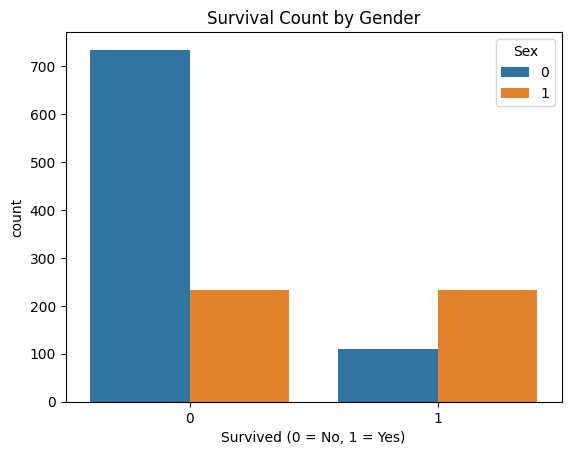

In [22]:
# Survival by Gender
sns.countplot(x='2urvived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()



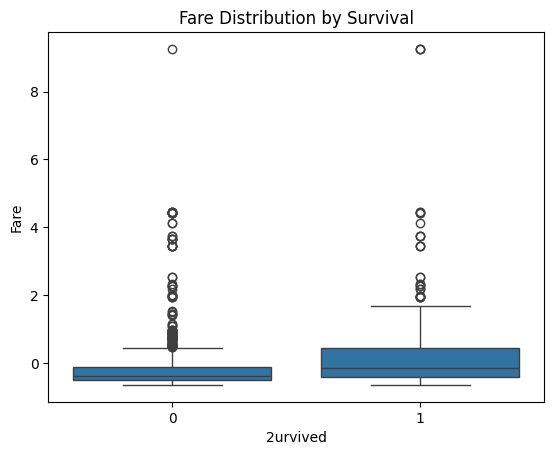

In [23]:
# Fare Distribution
sns.boxplot(x='2urvived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

# Model Prediction

In [7]:
# Feature scaling for Fare
df['Fare'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()

In [8]:
# Splitting features and target
X = df.drop(columns=['2urvived'])  # Features
y = df['2urvived']                # Target


In [9]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
# Training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Predictions and evaluation
y_pred = model.predict(X_test)

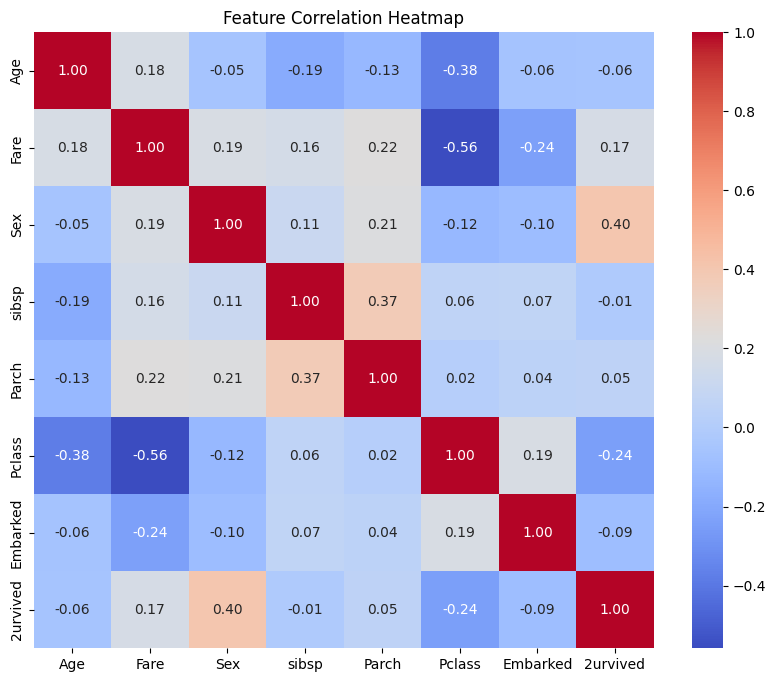

In [29]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

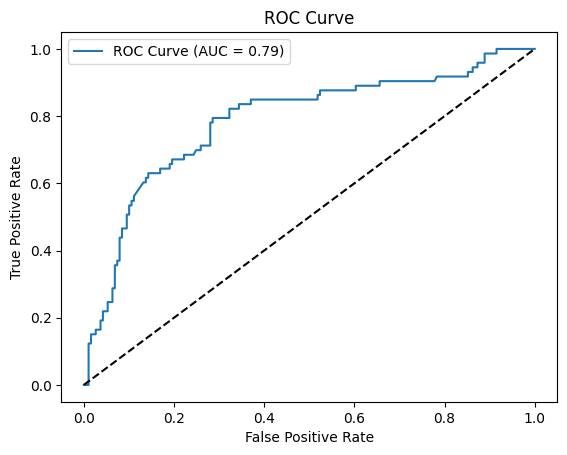

In [31]:

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       189
           1       0.64      0.37      0.47        73

    accuracy                           0.77       262
   macro avg       0.72      0.65      0.66       262
weighted avg       0.75      0.77      0.74       262


Confusion Matrix:


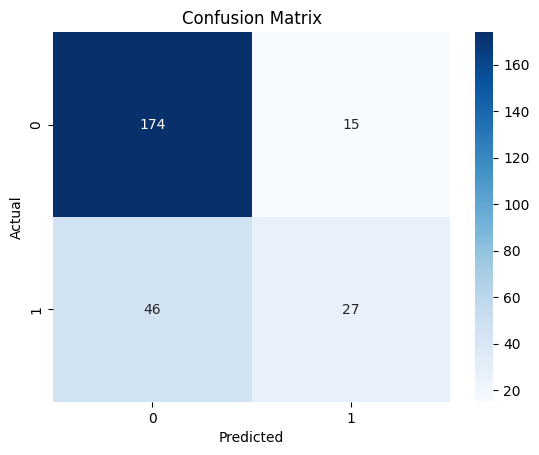

In [12]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [25]:

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validation Accuracy: 0.77 ± 0.05


In [28]:

# Hyperparameter tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
print(f"Optimized Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Optimized Model Accuracy: 0.77


In [13]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
    Feature  Coefficient
2       Sex     1.850818
1      Fare    -0.000609
0       Age    -0.026147
4     Parch    -0.051240
6  Embarked    -0.064019
3     sibsp    -0.185636
5    Pclass    -0.753405


In [33]:
# Save the model
joblib.dump(model, 'titanic_model.pkl')
print("Model saved as titanic_model.pkl")

# Load the model
loaded_model = joblib.load('titanic_model.pkl')
print(f"Loaded Model Accuracy: {loaded_model.score(X_test, y_test):.2f}")

Model saved as titanic_model.pkl
Loaded Model Accuracy: 0.77
